# Social Media Scrapping

In [1]:
#importing praw package.
import praw

# entering string into user agent, which is bot to Reddit's servers.
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
# Creating a Reddit instance by PRAW with reddit app credentials.
reddit = praw.Reddit(
    client_id="g8YbazW8sy1UtDVuiHirpg", #unique client_id of reddit app
    client_secret="fWfc-zzk4QULIzSq4EkZTSg8GjVJrw", #unique client_secert of reddit app
    user_agent=user_agent #User agent string.
)

## Authentication with the Reddit APP by Using Keys.

In [2]:
# importing pandas, numpy, regression package.
import pandas as pd
import numpy as np
import re 

## Information about the Hot Topics in the Bitcoin

In [3]:
# Hot new rising topics

# Initializing an Empty Set to Store Headlines
headlines = set()
# Writing a Loop through the Hot Topic
for submission in reddit.subreddit("Google").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break #Breaking the Loop After processing
    headlines.add(submission.title) #Title of the Submission to the Set of Headlines
print(len(headlines))#Printing the Total Number of Headlines

Support Megathread - November 2023
17kz862
AutoModerator
1698796901.0
14
0.95
https://www.reddit.com/r/google/comments/17kz862/support_megathread_november_2023/
0


## Counting Unique Titles of Hot Topics in the Bitcoin

In [4]:
# Initializing an Empty Set to Store Headlines
headlines = set()
# Writing a Loop through the Hot Topic
for submission in reddit.subreddit("Google").hot(limit=None):
    headlines.add(submission.title)#Title of the Submission to the Set of Headlines
print(len(headlines))#Printing the Total Number of Headlines

177


## Creation of Dataframe

In [5]:
# Creating a Dataset from the List of Headlines
google_df = pd.DataFrame(headlines)
google_df.head() #Displaying First 5 Rows

,0
0,Google's Gemini Advanced: Redefining Premium A...
1,Room for 1 More Geminite? GPT-4 …Coincidence? ...
2,Google Messages taking time to verify number f...
3,Don't buy Pixel 7 Series in India.
4,Google play × three point boost


In [6]:
# Retrieving the Column Names of the DataFrame
google_df.columns

RangeIndex(start=0, stop=1, step=1)

## Changing Column Name

In [7]:
# Changing the Column Name
google_df.columns = ['Titles']

In [8]:
#Displaying First 5 Rows
google_df.head()

,Titles
0,Google's Gemini Advanced: Redefining Premium A...
1,Room for 1 More Geminite? GPT-4 …Coincidence? ...
2,Google Messages taking time to verify number f...
3,Don't buy Pixel 7 Series in India.
4,Google play × three point boost


## Checking for Dulpicates in Column

In [9]:
# Number of Duplicate Title in the 'Titles' column
google_df.Titles.duplicated().sum()

0

## Cleaning the text

In [10]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
google_df["Titles"]= google_df["Titles"].apply(cleanTxt)

#Show the clean text
google_df.head()

,Titles
0,Google's Gemini Advanced Redefining Premium AI...
1,Room for 1 More Geminite? GPT-4 …Coincidence? ...
2,Google Messages taking time to verify number f...
3,Don't buy Pixel 7 Series in India.
4,Google play × three point boost


## Removing the emoji's from Reddit App

In [11]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
google_df["Titles"]= google_df["Titles"].apply(remove_emoji)

#Show the clean text
google_df.head()

,Titles
0,Google's Gemini Advanced Redefining Premium AI...
1,Room for 1 More Geminite? GPT-4 …Coincidence? ...
2,Google Messages taking time to verify number f...
3,Don't buy Pixel 7 Series in India.
4,Google play × three point boost


In [12]:
# Importing Textblob, WordCloud, Stopwords Libraries.
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Sentiment Analysis on Reddit

In [13]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
google_df['Subjectivity'] = google_df['Titles'].apply(getSubjectivity)
google_df['Polarity'] = google_df['Titles'].apply(getPolarity)

#Now display data
google_df.head()

,Titles,Subjectivity,Polarity
0,Google's Gemini Advanced Redefining Premium AI...,0.6,0.40
1,Room for 1 More Geminite? GPT-4 …Coincidence? ...,0.5,0.25
2,Google Messages taking time to verify number f...,0.0,0.00
3,Don't buy Pixel 7 Series in India.,0.0,0.00
4,Google play × three point boost,0.0,0.00


In [14]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0: # If the polarity score is less than 0, "Negative"
        return "Negative"
    elif score == 0: # If the polarity score is Equal to 0, "Equal"
        return "Neutral"
    else: # If the polarity score is more than to 0, "Positive"
        return "Positive"
# Applying the getInsight function to the 'Polarity' column and creating a new column 'Insight' to store   
google_df["Insight"] = google_df["Polarity"].apply(getInsight)

# Displaying the first 50 rows
google_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Google's Gemini Advanced Redefining Premium AI...,0.600000,0.400000,Positive
1,Room for 1 More Geminite? GPT-4 …Coincidence? ...,0.500000,0.250000,Positive
2,Google Messages taking time to verify number f...,0.000000,0.000000,Neutral
3,Don't buy Pixel 7 Series in India.,0.000000,0.000000,Neutral
4,Google play × three point boost,0.000000,0.000000,Neutral
5,Lets Turn Google Earth To Matrix 0.1 (Lets Tur...,0.000000,0.000000,Neutral
6,Does Google SSO allow double opt in,0.000000,0.000000,Neutral
7,Google new Twitter profile,0.454545,0.136364,Positive
8,Help download,0.000000,0.000000,Neutral
9,Glitch/bug on Google app,0.000000,0.000000,Neutral


## Data Visualization

In [15]:
# Import seaborn library, warnings, Wordcloud, Stopwords, Matplotlib libraries
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Set the plotting style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

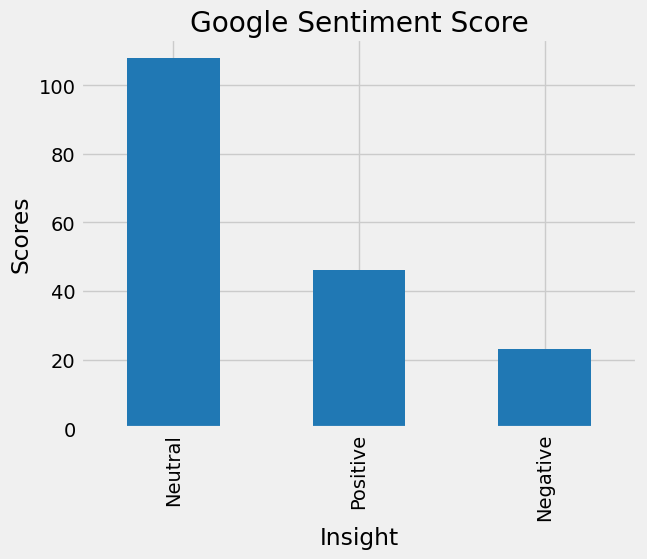

In [16]:
#Plot the values count of sentiment
plt.title("Google Sentiment Score") # Setting the title
plt.xlabel("Sentiment")  # Setting the label for the x-axis
plt.ylabel("Scores") # Setting the label for the y-axis
plt.rcParams["figure.figsize"] = (15,10) # Setting the size
google_df["Insight"].value_counts().plot(kind="bar", color="#2078B4") # Plotting the value counts of 'Insight' column
plt.show() # Display the plot

## Wordcloud for Column

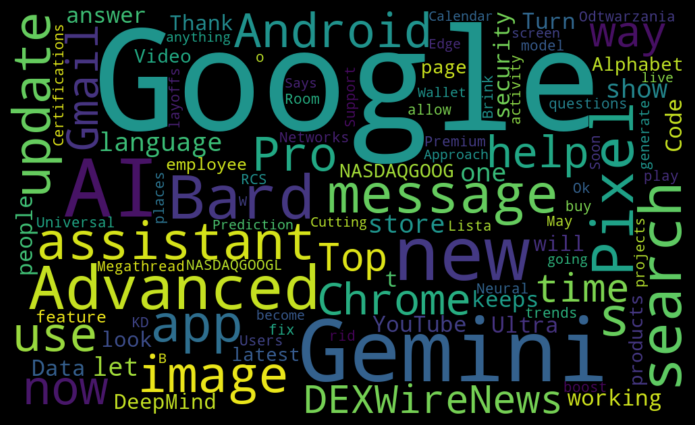

In [17]:
text = ' '.join( [twts for twts in google_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(10,5), facecolor='k' ) # Setting the size and background color
plt.imshow(wordcloud, interpolation='bilinear') # Display the word cloud
plt.axis("off"); # Turn off the axis

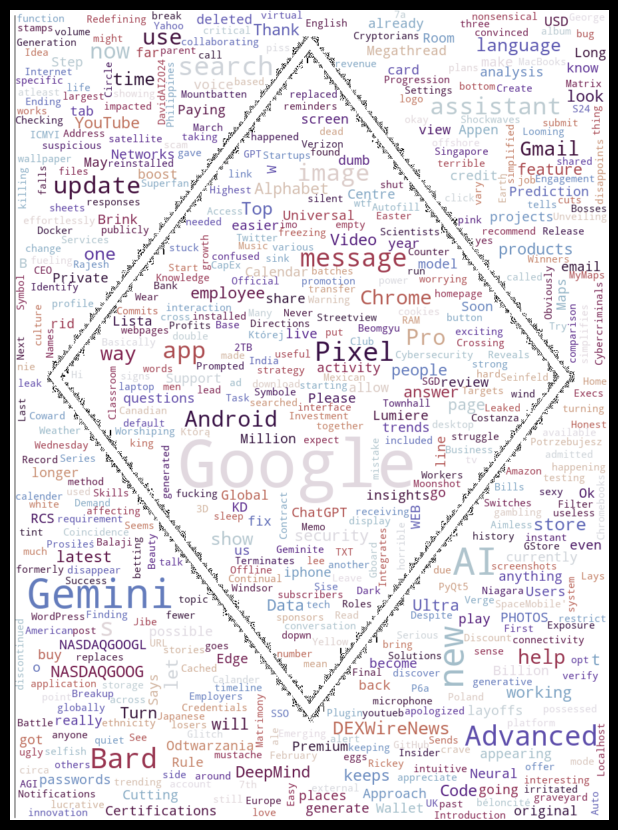

In [28]:
from PIL import Image
import numpy as np

# Assuming you have already imported your data and stored the titles in the 'google_df' DataFrame

# Join all titles into a single string
text = ' '.join([twts for twts in google_df['Titles']])

image= Image.open('Rhombus.jpg')
mask=np.array(image)
max_font_size=100
min_font_size=15

wordcloud = WordCloud(width=1000, height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,mask=mask,contour_width=0.01,colormap='twilight',
                      max_font_size=max_font_size,min_font_size=min_font_size,
                      background_color="White").generate(text)


# Display the generated image with the pentagon shape
plt.figure(figsize=(15,10), facecolor='k')  # Setting the size and background color
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with the pentagon shape
plt.axis("off")  # Turn off the axis
plt.show()

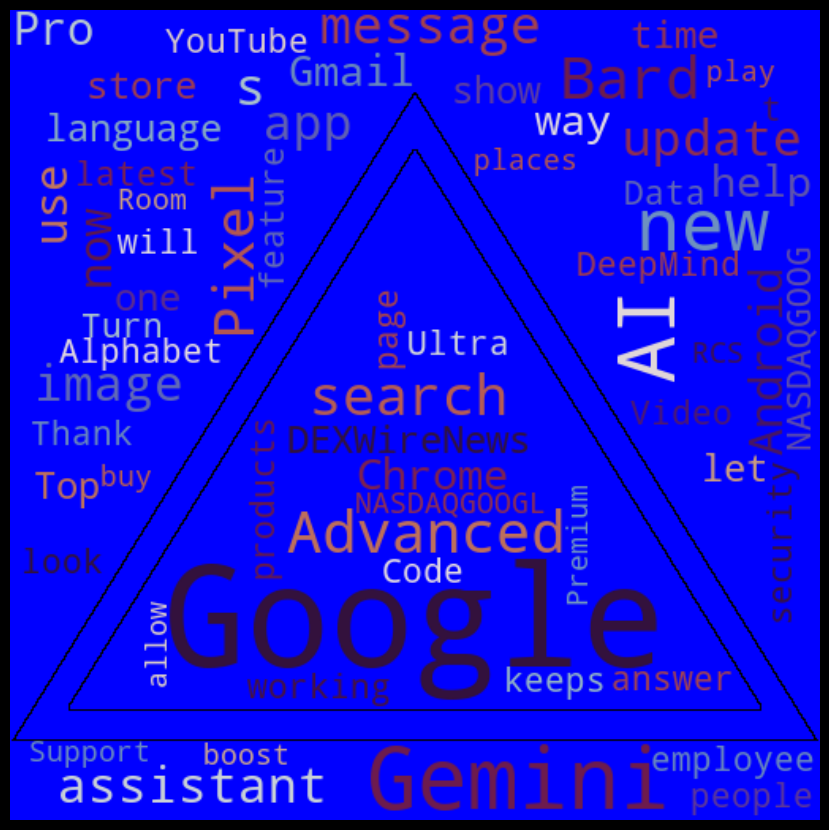

In [30]:
from PIL import Image
import numpy as np

# Assuming you have already imported your data and stored the titles in the 'google_df' DataFrame

# Join all titles into a single string
text = ' '.join([twts for twts in google_df['Titles']])

image= Image.open('Trianglee.png')
mask=np.array(image)
max_font_size=100
min_font_size=15

wordcloud = WordCloud(width=1000, height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,mask=mask,contour_width=0.01,colormap='twilight',
                      max_font_size=max_font_size,min_font_size=min_font_size,
                      background_color="Blue").generate(text)


# Display the generated image with the pentagon shape
plt.figure(figsize=(15,10), facecolor='k')  # Setting the size and background color
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with the pentagon shape
plt.axis("off")  # Turn off the axis
plt.show()